In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from decision_trees.config import data_path
from decision_trees.plotting_utils import *

sns.set_context("talk")

# settings
%load_ext autoreload
%autoreload 2

## 1. Load In Data

Load in data (cleaned if was necessary)

In [2]:
fpath = "processed/breast_cancer.csv"
df = pd.read_csv(data_path / fpath)
df.head()

,age,race,marital_status,t_stage,n_stage,stage,differentiate,grade,a_stage,tumor_size,...,regional_node_positive,survival_months,status,t_stage_num,n_stage_num,stage_num,has_estrogen,has_progesterone,is_alive,is_metastasized
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,...,1,60,Alive,1,1,1,True,True,True,False
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,...,5,62,Alive,2,2,3,True,True,True,False
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,...,7,75,Alive,3,3,5,True,True,True,False
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,...,1,84,Alive,1,1,1,True,True,True,False
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,...,1,50,Alive,2,1,2,True,True,True,False


## 2. Describe data

Things to consider:
* datatypes: cat, float, int, datetime
* distributions of numerical data ~ predictor
* multi-variate distributions 

https://ieee-dataport.org/open-access/seer-breast-cancer-data

more info on 6th edition stages: https://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th/

Columns:
'Age': age of px at dx,
'Race': White, Black, Other, Other-Unspecified, Unknown (Other=Asian, Pacific Islander, American Indian)
'Marital Status': Single, Married, Separated, Divorced, Widowed. at time of dx,
'T Stage': size and extent of the main tumor (bigger is worse). T1-T4,
'N Stage': number of nearby affected lymph nodes. N1-N3,
'6th Stage': what stage of cancer - 6th edition stage of cancer, increases from IIA->IIB->IIIA->IIIB->IIIC,
'differentiate': range from Well->Moderate->Poorly->Undifferentiated, where undifferentiated is the worst,
'Grade': range from 1-4 (numerical encoding of "differentiate" column),
'A Stage': Regional or Distant. Distant means more metastasized (worse),
'Tumor Size': exact size in mm,
'Estrogen Status': if the tumor is Positive or Negative for estrogen receptors (if cancer cells are estrogen positive, it means it has receptors for estrogen, meaning estrogen levels affect the growth of the tumor. determining which receptor type you're positive for (estrogen and/or progesterone) determines what treatment options you have),
'Progesterone Status': Positive or Negative to progesterone receptors, same concept as estrogen,
'Regional Node Examined': total number of regional lymph nodes that were removed and examined by the pathologist,
'Regional Node Positive': total number of regional lymph nodes that were examined and found to be positive,
'Survival Months': amount of time px has survived since dx (if px is alive, this number is the min number of months they've survived, could be longer),
'Status': Alive or Dead

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     4024 non-null   int64 
 1   race                    4024 non-null   object
 2   marital_status          4024 non-null   object
 3   t_stage                 4024 non-null   object
 4   n_stage                 4024 non-null   object
 5   stage                   4024 non-null   object
 6   differentiate           4024 non-null   object
 7   grade                   4024 non-null   object
 8   a_stage                 4024 non-null   object
 9   tumor_size              4024 non-null   int64 
 10  estrogen_status         4024 non-null   object
 11  progesterone_status     4024 non-null   object
 12  regional_node_examined  4024 non-null   int64 
 13  regional_node_positive  4024 non-null   int64 
 14  survival_months         4024 non-null   int64 
 15  stat

## 3. Plot Data

[X] Pair plot, hue on survival status

[ ] Bi-variate plots ~ survival (e.g. n stage versus t stage colored by survival) (IN PROGRESS)

[ ] Correlation analysis/heatmap of numerical variables 

[ ] Distribution of survival months ~ survival status

[ ] P(survive) ~ survival months

[ ] Decide if we need to truncate is_alive depending on month


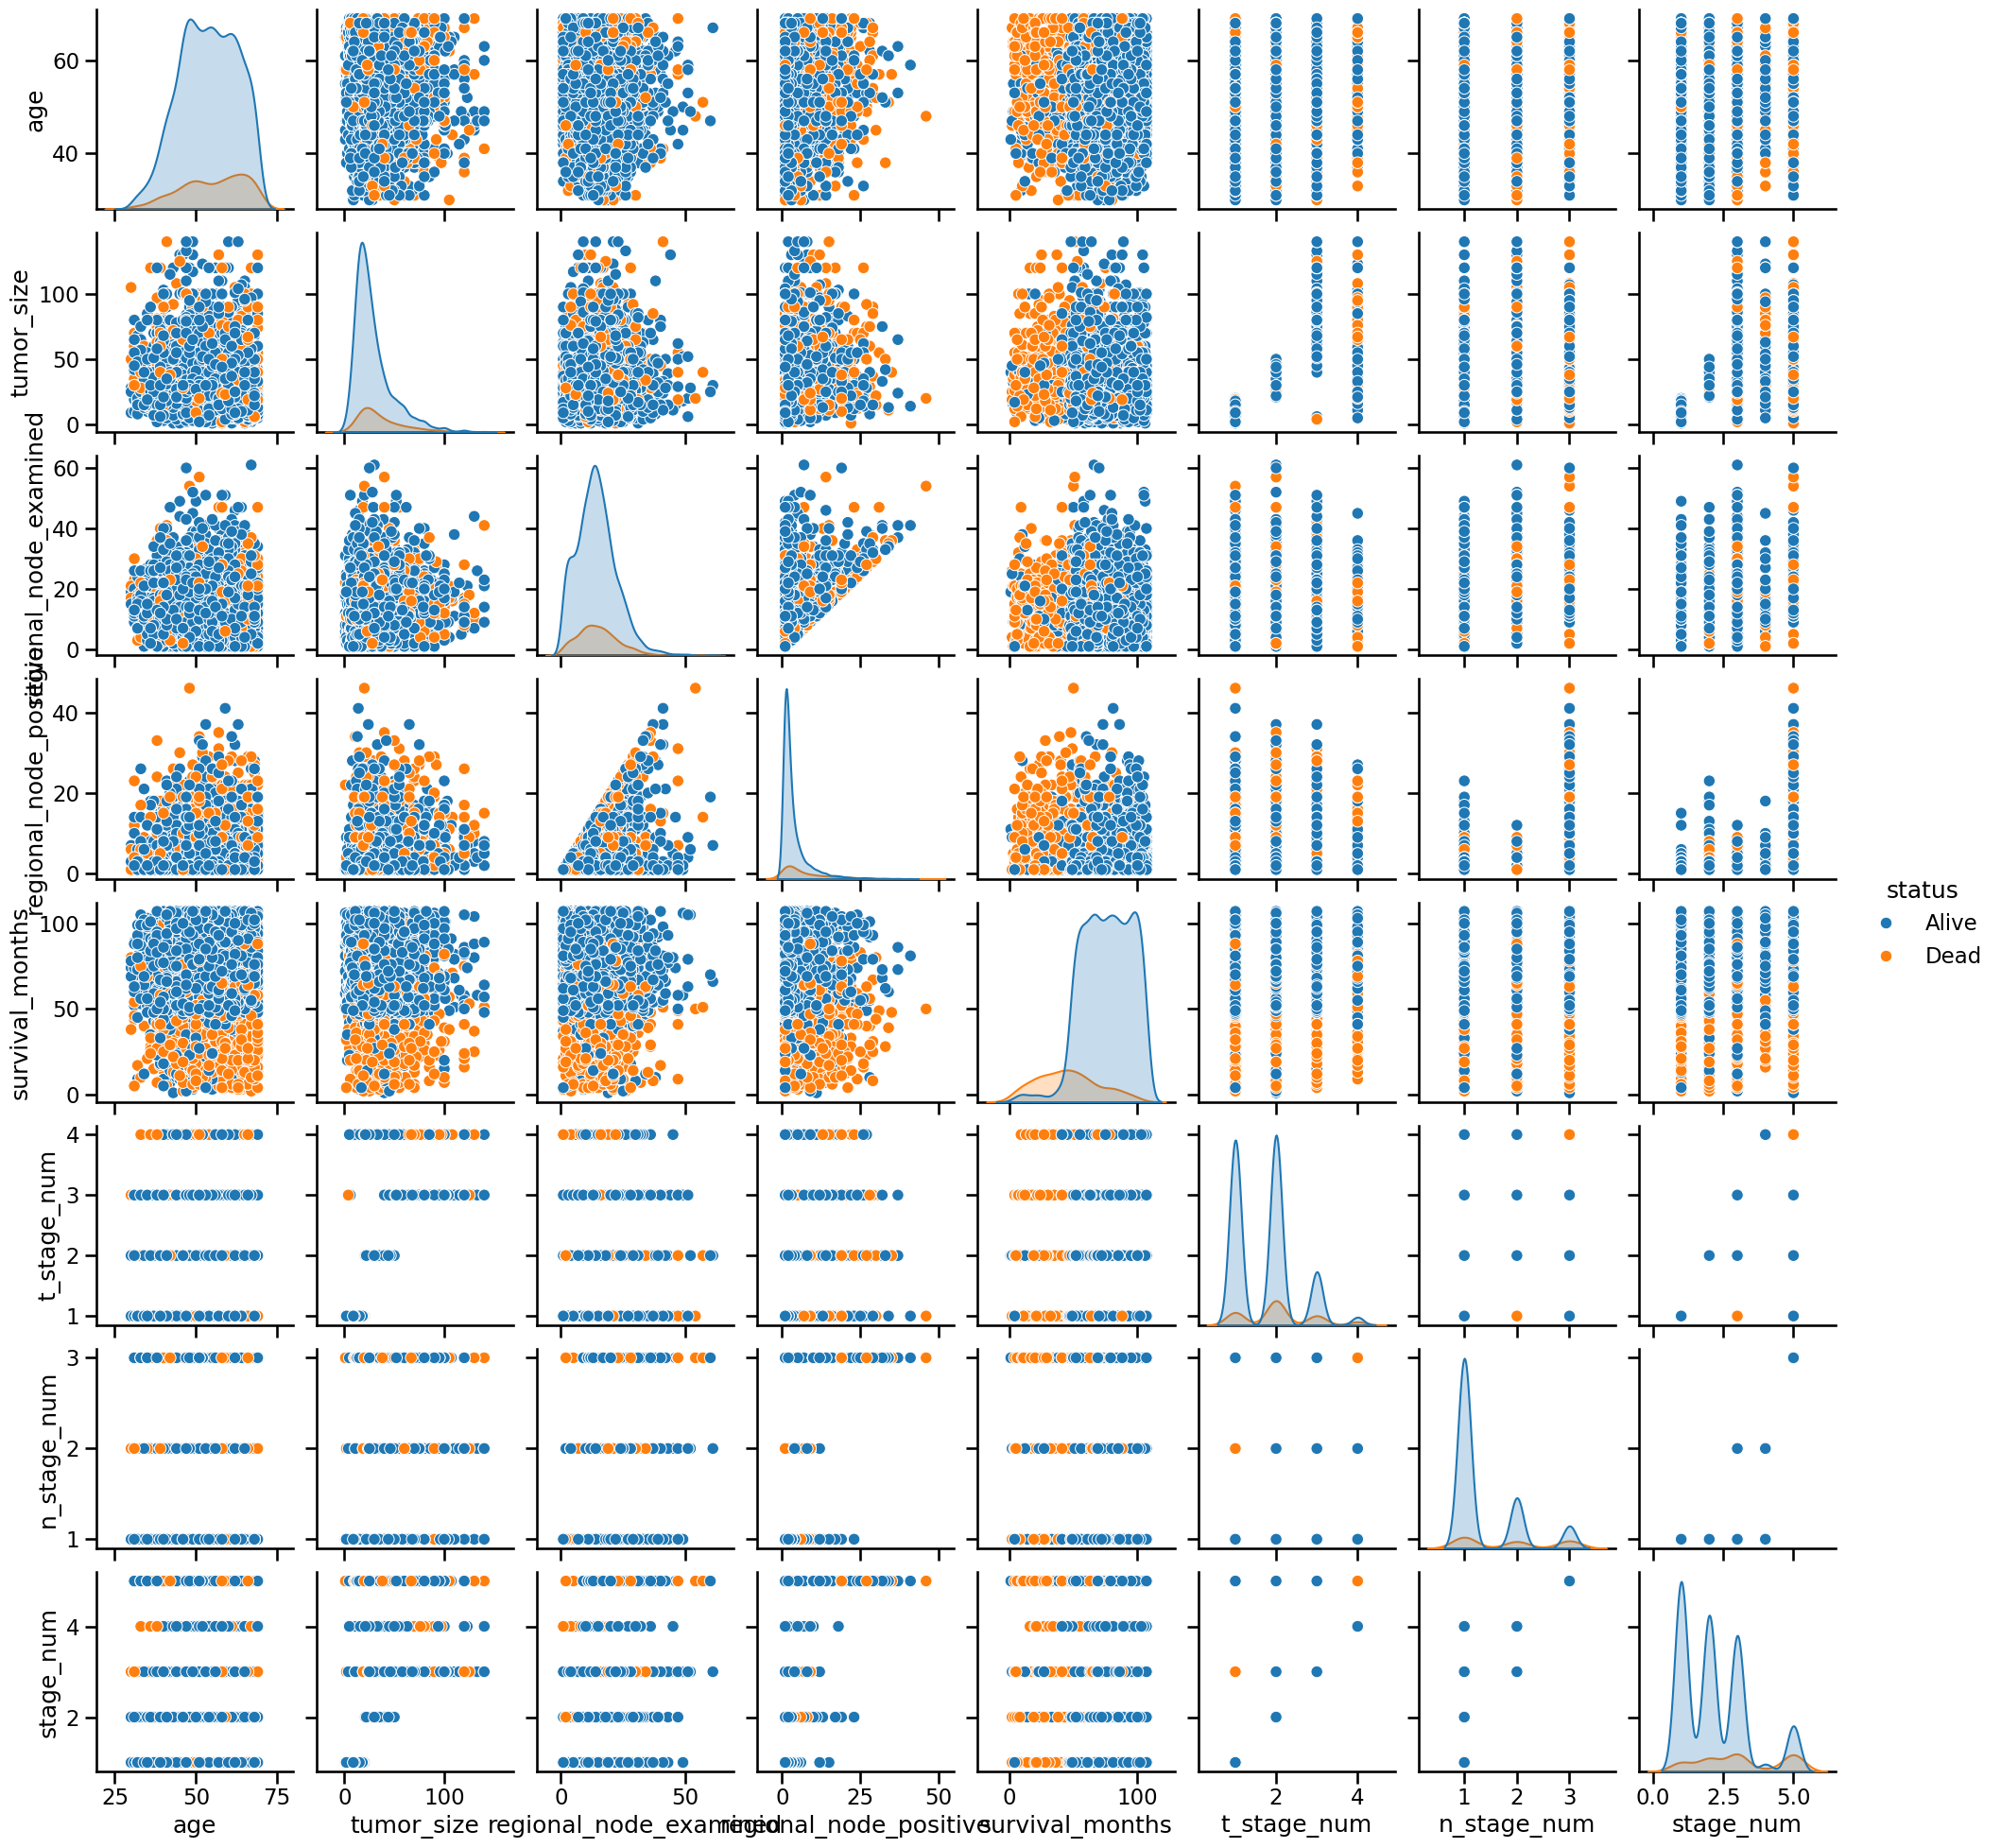

In [11]:
sns.pairplot(
    df.drop(
        columns=["has_progesterone", "has_estrogen", "is_metastasized", "is_alive"]
    ),
    hue="status",
)

In [65]:
def jitter_plot(df, x_col, y_col, hue_col="status", jitter_amount=0.4):
    """
    quick fx for jitter scatter plot
    """

    ax = mf((8, 6))

    x_jittered = df[x_col] + np.random.uniform(-jitter_amount, jitter_amount, len(df))
    y_jittered = df[y_col] + np.random.uniform(-jitter_amount, jitter_amount, len(df))

    # Create a scatter plot with jittered data
    sns.scatterplot(x=x_jittered, y=y_jittered, hue=df[hue_col], alpha=0.5, ax=ax)

    ax.legend(bbox_to_anchor=(1.05, 1))

    return None

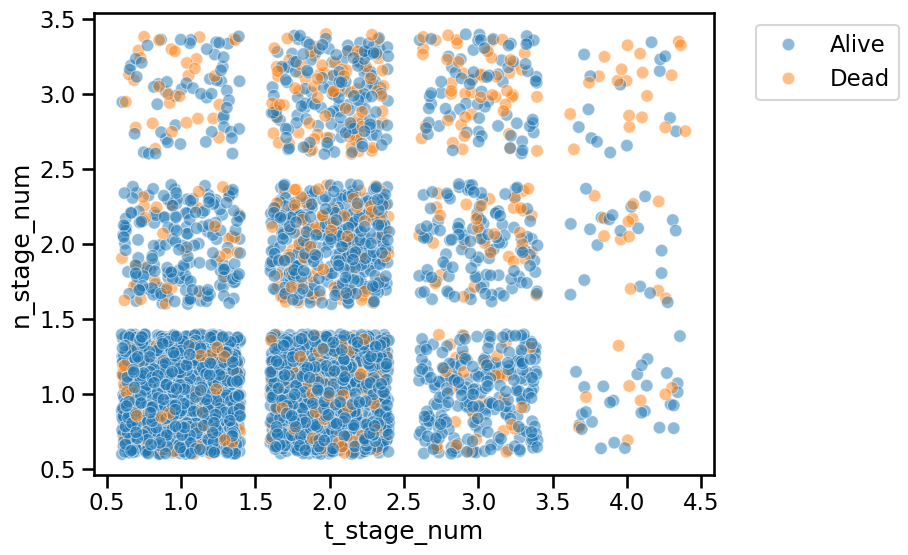

In [66]:
jitter_plot(df, "t_stage_num", "n_stage_num")

# TODO
- write heatmap function & test 
- write a wrapper that puts jitter scat & heatmap together (maybe?)
- compare remaining categorical values

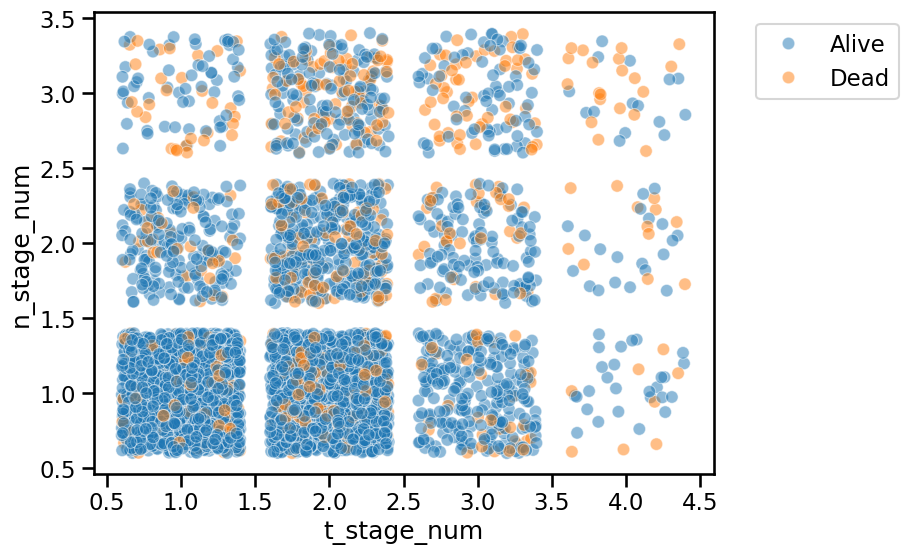

In [42]:
# plotting t stage vs n stage (as well as stage) hued by status

ax = mf((8, 6))
jitter_amount = 0.4
x_jittered = df["t_stage_num"] + np.random.uniform(
    -jitter_amount, jitter_amount, len(df["t_stage"])
)
y_jittered = df["n_stage_num"] + np.random.uniform(
    -jitter_amount, jitter_amount, len(df["n_stage"])
)

# Create a scatter plot with jittered data
sns.scatterplot(x=x_jittered, y=y_jittered, hue=df["status"], alpha=0.5, ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1))

In [51]:
n_t_stage_pivot = df.pivot_table(
    columns="t_stage_num",
    index="n_stage_num",
    values="is_alive",
    aggfunc="mean",
    margins=True,
)

n_t_stage_pivot

t_stage_num,1,2,3,4,All
n_stage_num,,,,,
1,0.926437,0.880531,0.881679,0.771429,0.901171
2,0.853081,0.794393,0.771812,0.625000,0.798780
3,0.655172,0.649123,0.581967,0.428571,0.616525
All,0.902059,0.830347,0.782364,0.607843,0.846918


<Axes: xlabel='t_stage_num', ylabel='n_stage_num'>

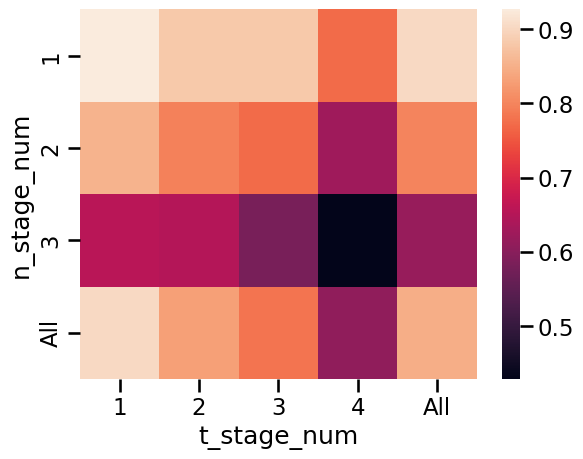

In [60]:
sns.heatmap(n_t_stage_pivot, cmap="rocket")

In [52]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [19]:
def example_plot_histogram(df, x_val, ax=None, title="", **kwargs):
    """
    Example function to plot a histogram using seaborn

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe containing the data to plot
    x_val : str
        Name of the column to plot
    ax : matplotlib.axes.Axes, optional
        Axes to plot on, by default None
    title : str, optional
        Title of the plot, by default ""
    **kwargs : dict
        Additional arguments to pass to seaborn.histplot,
        e.g. hue="var_name", ="stack"

    Returns
    -------
    matplotlib.axes.Axes
        Axes containing the plot
    """
    if ax is None:
        ax = mf()

    sns.histplot(data=df, x=x_val, ax=ax, **kwargs)

    ax.set_title(title)

    return ax

<Axes: xlabel='age', ylabel='Count'>

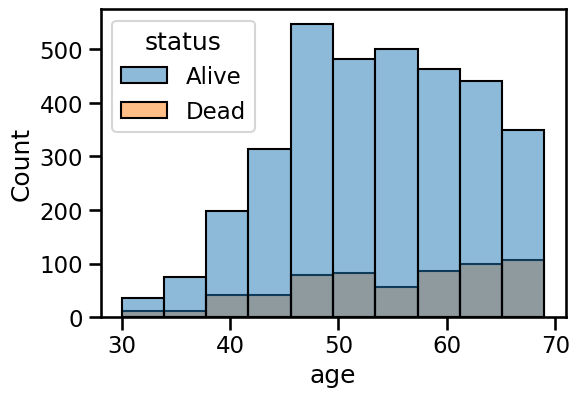

In [24]:
example_plot_histogram(df, x_val="age", hue="status", bins=10)

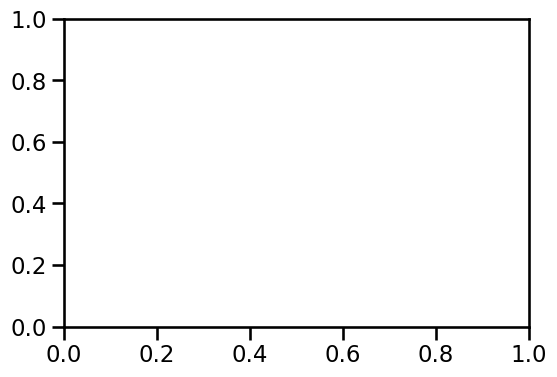

In [5]:
ax = mf((6, 4))  # mf = "make figure" from plot utils